# Load Data 

In [45]:
import os
import re
import nltk

import spacy
import string

import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt
#import PyPDF2
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
#from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\s\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
import os
import pandas as pd
import fitz  


file_paths = []
categories = []
file_names = []

# Set The Base Directory 
base_directory = r'D:\All_data_science_project\NLP\fine-tune-2\Task\data\data'


departments = os.listdir(base_directory)


for department in departments:
    directory_path = os.path.join(base_directory, department)
    
    
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.pdf'):
           
            file_path = os.path.join(directory_path, file_name)
            
            
            try:
                with fitz.open(file_path) as pdf_document:
                    extracted_text = ""
                    for page in pdf_document:
                        extracted_text += page.get_text()
            except Exception as e:
                print(f"Error processing {file_name}: {e}")
                continue
            
            
            file_paths.append(extracted_text)
            categories.append(department)
            file_names.append(file_name)
            
data = pd.DataFrame({
    'File_Name': file_names,
    'Raw_Details': file_paths,
    'Category': categories
})

# Display the DataFrame
print(data.head())

      File_Name                                        Raw_Details    Category
0  10554236.pdf  ACCOUNTANT\nSummary\nFinancial Accountant spec...  ACCOUNTANT
1  10674770.pdf  STAFF ACCOUNTANT\nSummary\nHighly analytical a...  ACCOUNTANT
2  11163645.pdf  ACCOUNTANT\nProfessional Summary\nTo obtain a ...  ACCOUNTANT
3  11759079.pdf  SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...  ACCOUNTANT
4  12065211.pdf  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...  ACCOUNTANT


Data Succesfully Loaded 

In [49]:
df = data.copy()

# Preprocessing The Data 

In [50]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

df['Raw_Details'] = df["Raw_Details"].apply(lambda x: preprocess(x))

# Save The Cleaned Data

In [51]:
df.to_csv("clean_data.csv",index = False)

In [52]:
df['Raw_Details'][0]

'accountant summary financial accountant specializing financial planning reporting analysis within department defense highlights account reconciliations results oriented financial reporting critical thinking accounting operations professional analysis financial systems erp enterprise resource planning software excellent facilitator accomplishments served tiger team identified resolved general ledger postings deams totaling accounting adjustments allowed first successful fiscal year end close collaboration dfas europe developed automated tool identified duplicate obligations tool allowed usafe deobligate duplicate obligations experience company name july november accountant city state enterprise resource planning office ero position accountant assigned defense enterprise accounting management system deams ero responsible identifying resolving issues affecting deams general ledger worked teammates procure pay orders cash budget report areas resolve daily challenges encountered deployment

In [53]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ACCOUNTANT                118
ADVOCATE                  118
FINANCE                   118
ENGINEERING               118
CHEF                      118
FITNESS                   117
AVIATION                  117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

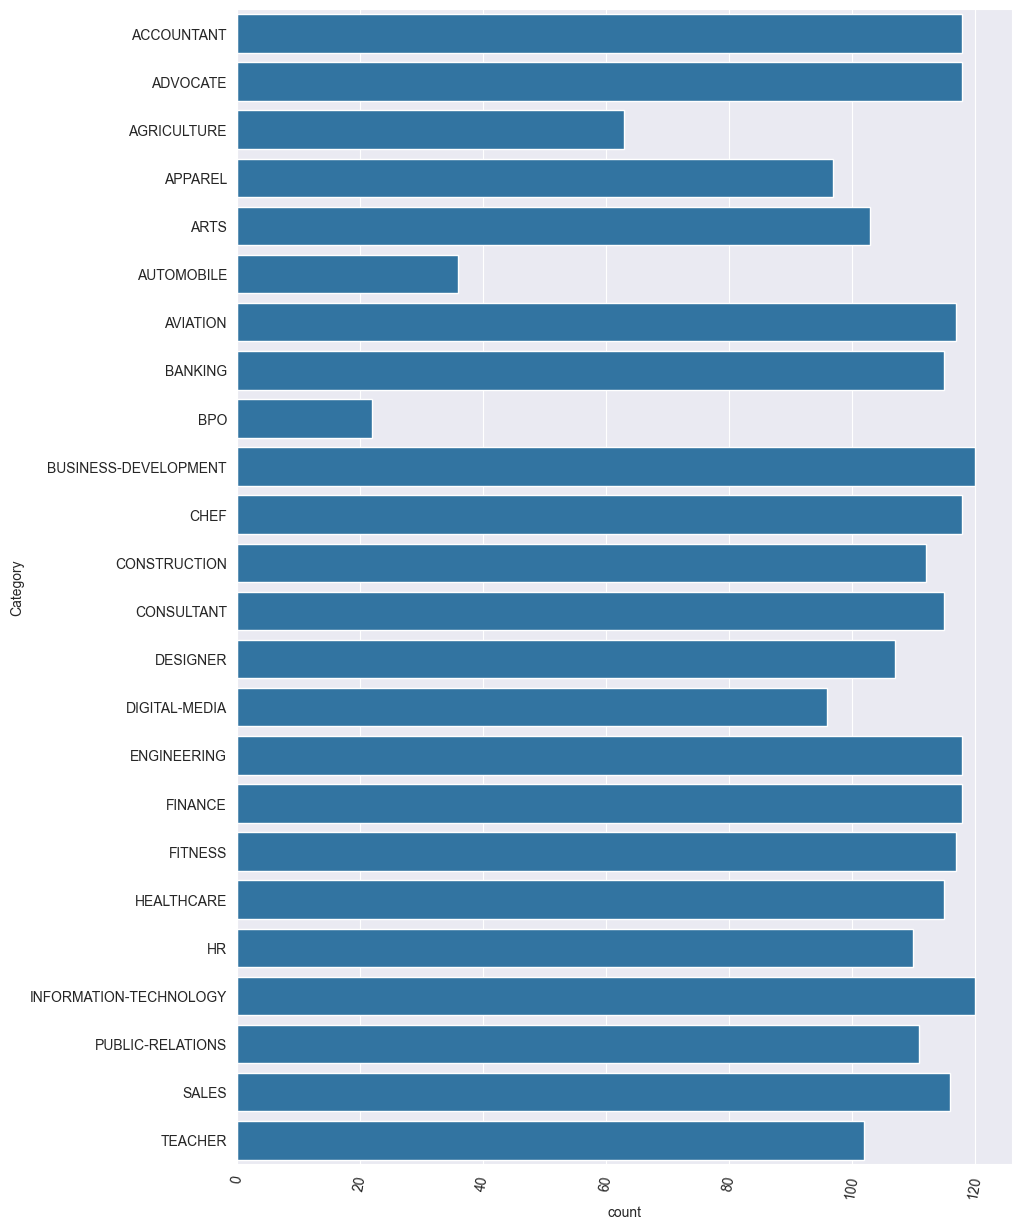

In [54]:
plt.figure(figsize=(10,15))
sns.countplot(df['Category'])
plt.xticks(rotation = 80)
plt.show()

In [55]:
x = df['Raw_Details'].values
y = df['Category'].values

# Split The Dataset

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
X_train.shape, X_test.shape

((1863,), (621,))

# Create Embeddings 

In [57]:
#creating BOW
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer = CountVectorizer(max_features=2000,ngram_range=(2,2))

In [58]:
X= countvectorizer.fit_transform(df['Raw_Details']).toarray()

In [59]:
countvectorizer.vocabulary_

{'accountant summary': 17,
 'financial planning': 667,
 'reporting analysis': 1453,
 'within department': 1961,
 'account reconciliations': 15,
 'results oriented': 1489,
 'financial reporting': 669,
 'critical thinking': 364,
 'accounting operations': 24,
 'analysis financial': 78,
 'resource planning': 1477,
 'general ledger': 715,
 'fiscal year': 679,
 'year end': 1996,
 'end close': 546,
 'experience company': 619,
 'company name': 280,
 'name july': 1126,
 'city state': 238,
 'management system': 997,
 'program management': 1356,
 'air force': 73,
 'name april': 1121,
 'general accounting': 711,
 'accounting finance': 21,
 'status reports': 1756,
 'mission critical': 1105,
 'staff accountant': 1672,
 'accounting financial': 22,
 'analysis reporting': 79,
 'reporting requirements': 1455,
 'resolve issues': 1472,
 'accounting system': 28,
 'performance metrics': 1254,
 'rules regulations': 1496,
 'management reports': 989,
 'one one': 1200,
 'training support': 1894,
 'provided trai

# Model Building 

In [77]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.28
Accuracy of  test set    : 0.24
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                        precision    recall  f1-score   support

            ACCOUNTANT       0.91      0.42      0.57        24
              ADVOCATE       0.09      0.10      0.09        20
           AGRICULTURE       0.00      0.00      0.00        11
               APPAREL       0.14      0.13      0.14        15
                  ARTS       0.08      0.21      0.11        24
            AUTOMOBILE       0.00      0.00      0.00         3
              AVIATION       0.09      0.84      0.17        25
               BANKING       0.00      0.00      0.00        24
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.90      0.38      0.53        24
                  CHEF       1.00      0.36      0.53        33
          CONSTRUCTION       0.39      0.32      0.35        22
            CONSULTANT      

In [62]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.53
Classification report for classifier DecisionTreeClassifier():
                        precision    recall  f1-score   support

            ACCOUNTANT       0.86      0.75      0.80        24
              ADVOCATE       0.20      0.15      0.17        20
           AGRICULTURE       0.29      0.36      0.32        11
               APPAREL       0.05      0.07      0.05        15
                  ARTS       0.31      0.17      0.22        24
            AUTOMOBILE       0.20      0.33      0.25         3
              AVIATION       0.37      0.52      0.43        25
               BANKING       0.18      0.12      0.15        24
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.67      0.75      0.71        24
                  CHEF       0.96      0.73      0.83        33
          CONSTRUCTION       0.48      0.45      0.47        22
            CONSULTANT       0.62      0

In [63]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.66
Classification report for classifier RandomForestClassifier(n_estimators=200):
                        precision    recall  f1-score   support

            ACCOUNTANT       0.72      0.96      0.82        24
              ADVOCATE       0.37      0.35      0.36        20
           AGRICULTURE       0.40      0.18      0.25        11
               APPAREL       0.10      0.07      0.08        15
                  ARTS       0.80      0.17      0.28        24
            AUTOMOBILE       0.00      0.00      0.00         3
              AVIATION       0.38      0.64      0.48        25
               BANKING       0.50      0.17      0.25        24
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.60      0.88      0.71        24
                  CHEF       0.93      0.79      0.85        33
          CONSTRUCTION       0.79      0.86      0.83        22
            CONSULTANT  

In [64]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.84
Accuracy of  test set    : 0.50
Classification report for classifier SVC():
                        precision    recall  f1-score   support

            ACCOUNTANT       0.77      0.83      0.80        24
              ADVOCATE       0.20      0.50      0.29        20
           AGRICULTURE       0.00      0.00      0.00        11
               APPAREL       0.05      0.07      0.06        15
                  ARTS       0.70      0.29      0.41        24
            AUTOMOBILE       0.00      0.00      0.00         3
              AVIATION       0.20      0.72      0.32        25
               BANKING       0.43      0.25      0.32        24
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.73      0.79      0.76        24
                  CHEF       1.00      0.61      0.75        33
          CONSTRUCTION       0.59      0.45      0.51        22
            CONSULTANT       0.21      0.26      0.23      

In [65]:
model_lgr = LogisticRegression()
model_lgr.fit(X_train, y_train)
y_pred = model_lgr.predict(X_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.56
Classification report for classifier LogisticRegression():
                        precision    recall  f1-score   support

            ACCOUNTANT       0.72      0.75      0.73        24
              ADVOCATE       0.33      0.40      0.36        20
           AGRICULTURE       0.14      0.18      0.16        11
               APPAREL       0.19      0.27      0.22        15
                  ARTS       0.26      0.29      0.27        24
            AUTOMOBILE       0.00      0.00      0.00         3
              AVIATION       0.41      0.56      0.47        25
               BANKING       0.33      0.25      0.29        24
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.72      0.88      0.79        24
                  CHEF       0.88      0.67      0.76        33
          CONSTRUCTION       0.54      0.59      0.57        22
            CONSULTANT       0.40      0.32 

In [66]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(X_train, y_train)
y_pred = model_bagg.predict(X_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.48
Accuracy of  test set    : 0.23
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                        precision    recall  f1-score   support

            ACCOUNTANT       0.64      0.38      0.47        24
              ADVOCATE       0.11      0.10      0.11        20
           AGRICULTURE       0.00      0.00      0.00        11
               APPAREL       0.29      0.13      0.18        15
                  ARTS       0.07      0.08      0.08        24
            AUTOMOBILE       0.00      0.00      0.00         3
              AVIATION       0.07      0.52      0.13        25
               BANKING       0.00      0.00      0.00        24
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.73      0.46      0.56        24
                  CHEF       1.00      0.36      0.53        33
          CONSTRUCTION  

In [67]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(X_train, y_train)
y_pred = model_NB.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.82
Accuracy of  test set    : 0.55
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                        precision    recall  f1-score   support

            ACCOUNTANT       0.65      0.92      0.76        24
              ADVOCATE       0.29      0.35      0.32        20
           AGRICULTURE       0.15      0.18      0.17        11
               APPAREL       0.22      0.13      0.17        15
                  ARTS       0.35      0.25      0.29        24
            AUTOMOBILE       0.00      0.00      0.00         3
              AVIATION       0.46      0.44      0.45        25
               BANKING       0.27      0.17      0.21        24
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.63      0.71      0.67        24
                  CHEF       0.88      0.70      0.78        33
          CONSTRUCTION       0.63      0.55      0.59        22
            CONSULTANT   

In [68]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(X_train, y_train)
y_pred = model_GradientBoost.predict(X_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.56
Accuracy of  test set    : 0.49
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                        precision    recall  f1-score   support

            ACCOUNTANT       0.83      0.21      0.33        24
              ADVOCATE       0.50      0.05      0.09        20
           AGRICULTURE       0.50      0.18      0.27        11
               APPAREL       0.00      0.00      0.00        15
                  ARTS       0.50      0.17      0.25        24
            AUTOMOBILE       0.00      0.00      0.00         3
              AVIATION       0.64      0.28      0.39        25
               BANKING       0.40      0.17      0.24        24
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.75      0.25      0.38        24
                  CHEF       0.88      0.70      0.78        33
          CONSTRUCTION       0.80      0.55      0.65 

In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model_XGBoost = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=7, random_state=0)

model_XGBoost.fit(X_train, y_train_encoded)

y_pred_encoded = model_XGBoost.predict(X_test)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

print('Accuracy of training set : {:.2f}'.format(model_XGBoost.score(X_train, y_train_encoded)))
print('Accuracy of test set    : {:.2f}'.format(model_XGBoost.score(X_test, y_test_encoded)))

print("Classification report for classifier %s:\n%s\n" % (model_XGBoost, classification_report(y_test_encoded, y_pred_encoded)))

xgb_cm = confusion_matrix(y_test_encoded, y_pred_encoded)

precision_XGBoost = round(precision_score(y_test_encoded, y_pred_encoded, average='macro'), 2)
recall_XGBoost = round(recall_score(y_test_encoded, y_pred_encoded, average='macro'), 2)
f1_XGBoost = round(f1_score(y_test_encoded, y_pred_encoded, average='macro'), 2)
accuracy_XGBoost = round(accuracy_score(y_test_encoded, y_pred_encoded), 2)

print(f"Precision: {precision_XGBoost}")
print(f"Recall: {recall_XGBoost}")
print(f"F1 Score: {f1_XGBoost}")
print(f"Accuracy: {accuracy_XGBoost}")


Accuracy of training set : 0.90
Accuracy of test set    : 0.64
Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...):
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.41    

In [70]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(X_train, y_train)
y_pred = model_Adaboost.predict(X_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.30
Accuracy of  test set    : 0.28
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                        precision    recall  f1-score   support

            ACCOUNTANT       1.00      0.75      0.86        24
              ADVOCATE       0.05      0.90      0.10        20
           AGRICULTURE       0.00      0.00      0.00        11
               APPAREL       0.00      0.00      0.00        15
                  ARTS       0.00      0.00      0.00        24
            AUTOMOBILE       0.00      0.00      0.00         3
              AVIATION       0.00      0.00      0.00        25
               BANKING       0.00      0.00      0.00        24
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.57      1.00      0.73        24
                  CHEF       0.29      0.06      0.10        33
          CONSTRUCTION       0.00      0.00      0.00        22
            CONSULTANT      

# Model Evaluation 

In [71]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier","XGBoost Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(X_train, y_train),model_DT.score(X_train, y_train),model_RF.score(X_train, y_train),model_svm.score(X_train, y_train),model_lgr.score(X_train, y_train),
                                 model_bagg.score(X_train, y_train),model_Adaboost.score(X_train, y_train),model_GradientBoost.score(X_train, y_train), model_NB.score(X_train, y_train), model_XGBoost.score(X_train, y_train_encoded)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB,accuracy_XGBoost],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB,precision_XGBoost],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB,recall_XGBoost],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB,f1_XGBoost]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.278812,0.240000,0.44,0.21,0.22
1,DecisionTree Classifier,1.000000,0.530000,0.48,0.48,0.48
2,RandomForest Classifier,1.000000,0.660000,0.59,0.59,0.57
3,SVM Classifier,0.841470,0.500000,0.51,0.44,0.45
4,Logistic Regression,0.999497,0.560000,0.51,0.51,0.50
5,Bagging Classifier,0.476095,0.230000,0.36,0.21,0.23
6,AdaBoost Classifier,0.296427,0.280000,0.29,0.26,0.24
7,Gradient Boosting Classifier,0.561651,0.490946,0.55,0.44,0.45
8,Naive Bayes Classifier,0.824862,0.550000,0.48,0.49,0.48
9,XGBoost Classifier,0.900856,0.640000,0.57,0.57,0.56


In [78]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes",'XGBoost']
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100,accuracy_XGBoost*100]
Train_accuracies=[model_knn.score(X_train, y_train)*100,model_DT.score(X_train, y_train)*100,
                  model_RF.score(X_train, y_train)*100,model_svm.score(X_train, y_train)*100,
                  model_lgr.score(X_train, y_train)*100,model_bagg.score(X_train, y_train)*100,
                  model_Adaboost.score(X_train, y_train)*100,model_GradientBoost.score(X_train, y_train)*100,
                  model_NB.score(X_train, y_train)*100,model_XGBoost.score(X_train,y_train_encoded)]

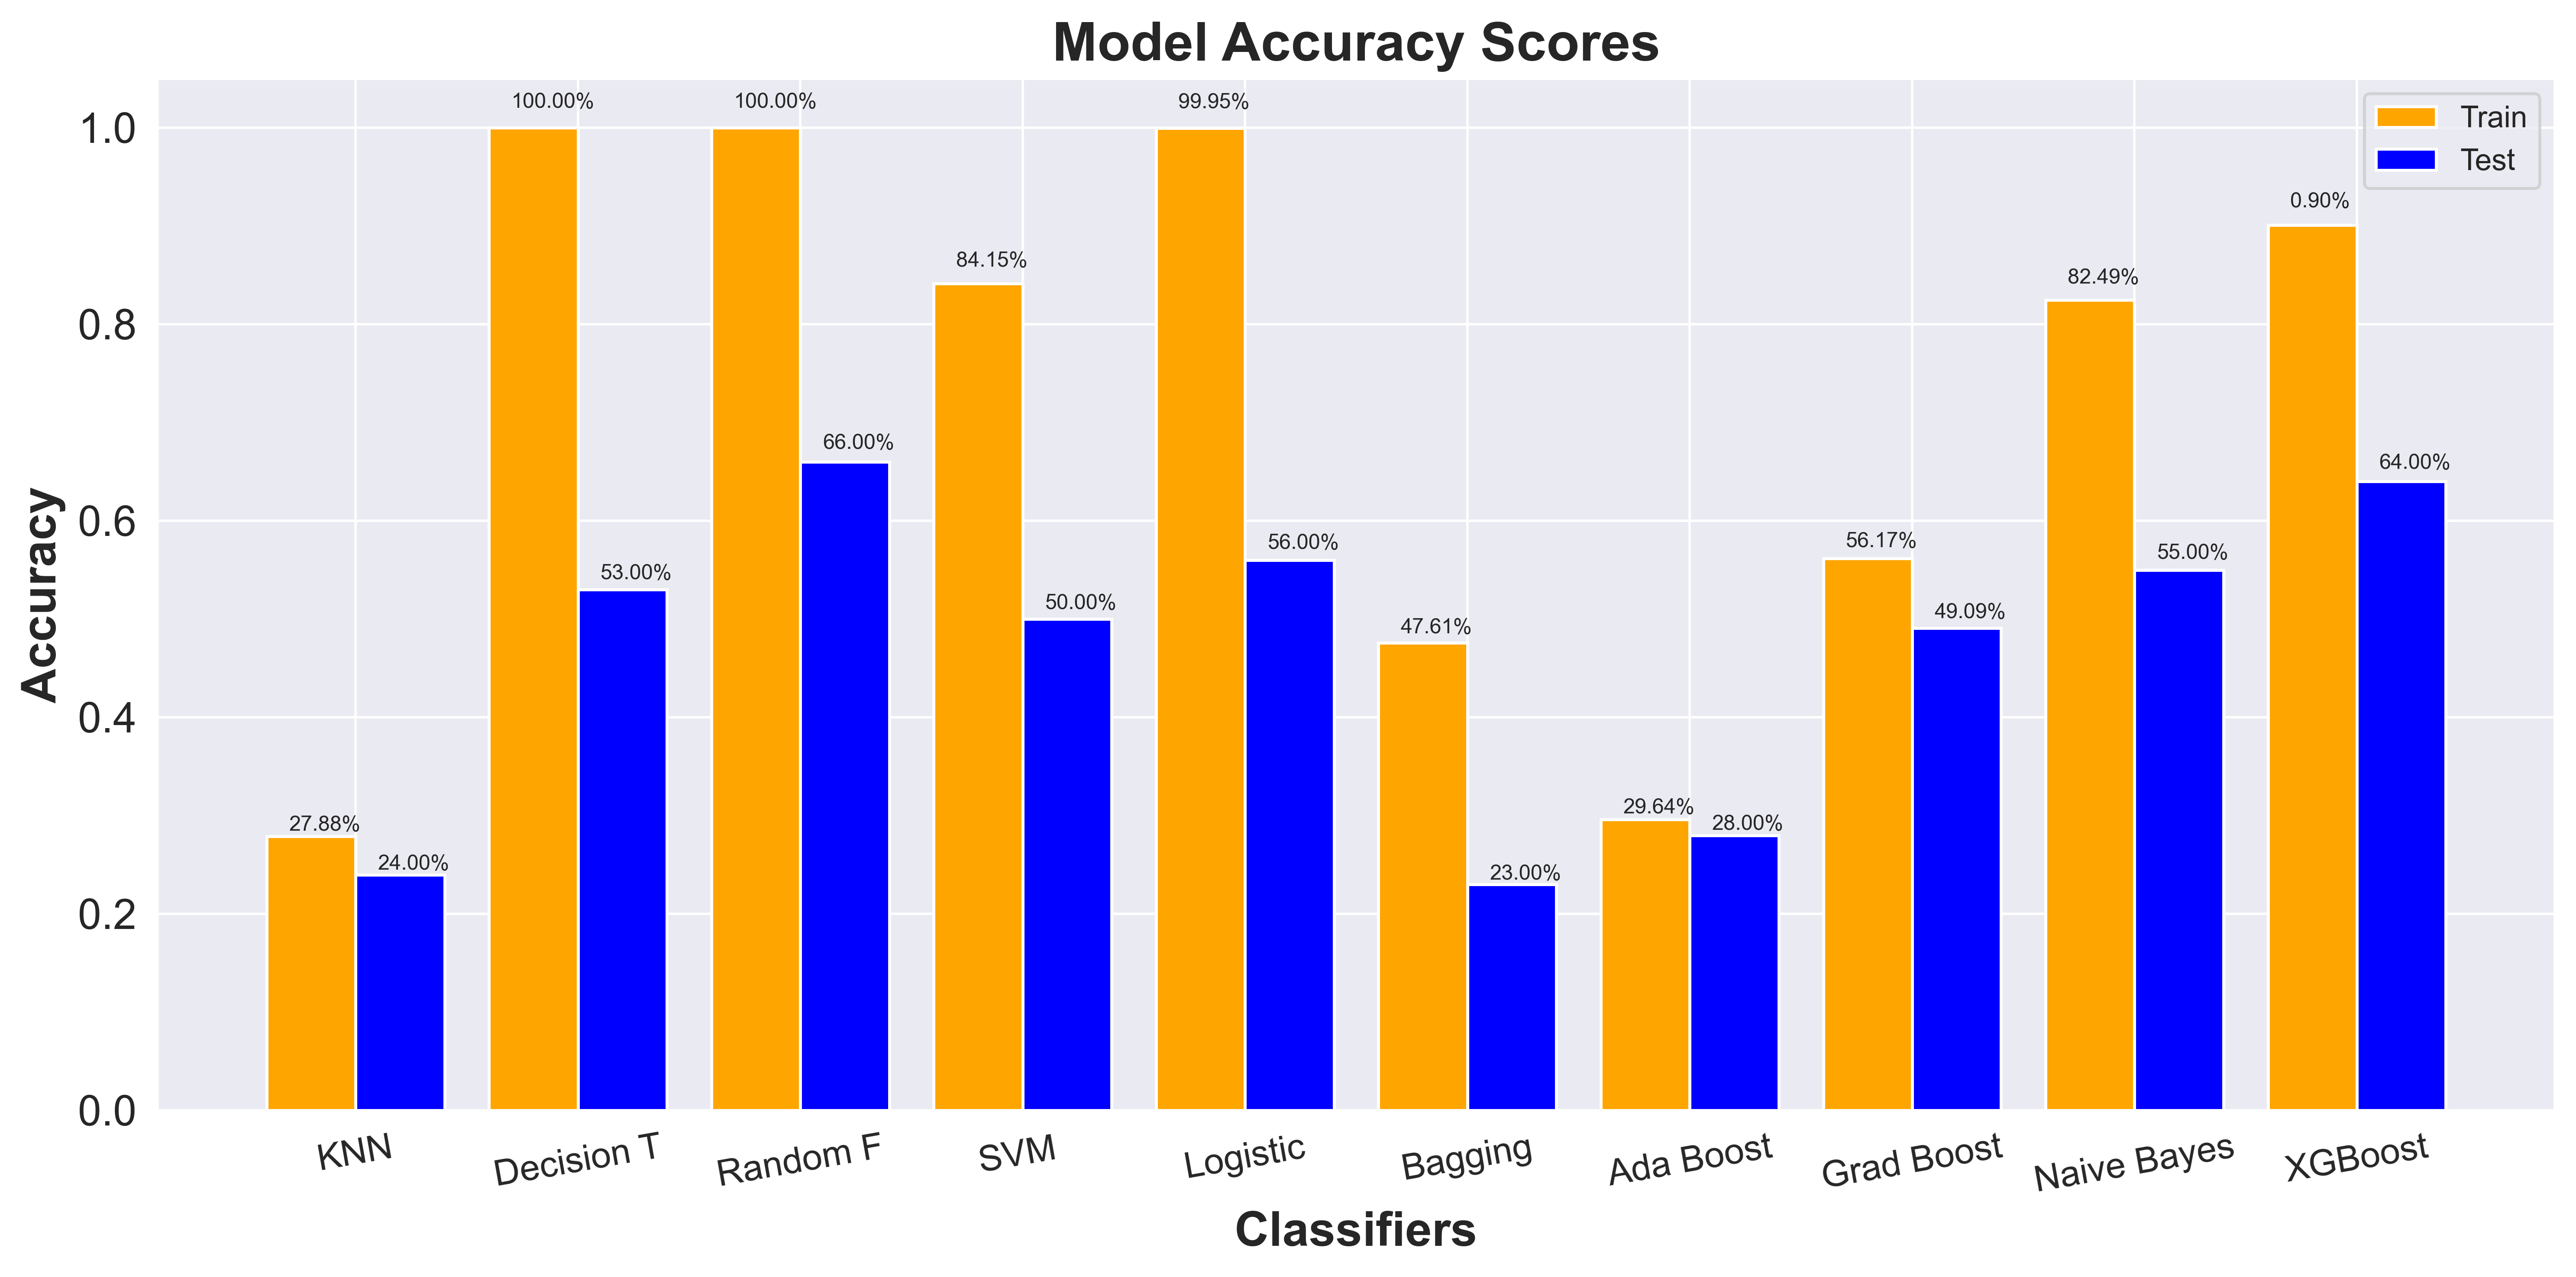

In [79]:

import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes","XGBoost"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
#fig.savefig('IMG\Mod_Acc_Bar', dpi = 500)

As XGBoost baase model performs better . So we can do HyperParameter tuning to reduce overfiiting and improve the model accuracy on Test Dataset 

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
cv_params = {'n_estimators': [100,200,300,400,500], 'learning_rate': [0.01, 0.1]}
other_params = {'learning_rate': 0.01,  'n_estimators': 100, 
                 'booster': 'gbtree', 
                'max_depth': 5, 'min_child_weight': 1, 'seed': 27,
                'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 
                'reg_alpha': 0, 'reg_lambda': 1,
                'objective': 'multi:softmax', 'num_class': 24}
model = XGBClassifier(**other_params)
classifier = GridSearchCV(estimator=model, param_grid=cv_params, cv=10, verbose=5, n_jobs=-1)
classifier.fit(X_train, y_train_encoded)
print("The best parameters are %s with a score of %0.2f" % (classifier.best_params_, classifier.best_score_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The best parameters are {'learning_rate': 0.01, 'n_estimators': 200} with a score of 0.67


As we can see XGBoost model performance slightly increases . If we use  some Custom Embeddings Techniques  and some other steps related to NLP techniques this model can perform better . But Improving the model performance manually is a  cumbersome process . So I go for  LLM Finetuning Approach . I will Fine tune BERT for This Text Classification (Resume Classification).Here I will fine tune The BERT Model with my custom dataset. 

AS i have no **GPU** i fully rely on Google Colab ; for this whole Fine tuning process . I attach the link here : https://colab.research.google.com/drive/1YUnvBLVpjeSnaM2xn9KnJdIJePxP5xik#scrollTo=FOWH1an8rKkc 

# Using Fine Tuned DistliBert For Resume Classification

In [ ]:

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

# Load the tokenizer and model
tokenizer_fine_tuned = DistilBertTokenizer.from_pretrained(r"D:\All_data_science_project\NLP\fine-tune-2\Task\saved_models")
model_fine_tuned = DistilBertForSequenceClassification.from_pretrained(r"D:\All_data_science_project\NLP\fine-tune-2\Task\saved_models")

In [22]:

df = pd.read_csv(r"D:\All_data_science_project\NLP\fine-tune-2\Task\clean_data.csv")

In [23]:
user_input = df['Raw_Details'][3]

In [24]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model_fine_tuned.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [25]:
df['Category'].unique()

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [28]:
label_map = {
    0: 'ACCOUNTANT',
    1: 'ADVOCATE',
    2: 'AGRICULTURE',
    3: 'APPAREL',
    4: 'ARTS',
    5: 'AUTOMOBILE',
    6: 'AVIATION',
    7: 'BANKING',
    8: 'BPO',
    9: 'BUSINESS-DEVELOPMENT',
    10: 'CHEF',
    11: 'CONSTRUCTION',
    12: 'CONSULTANT',
    13: 'DESIGNER',
    14: 'DIGITAL-MEDIA',
    15: 'ENGINEERING',
    16: 'FINANCE',
    17: 'FITNESS',
    18: 'HEALTHCARE',
    19: 'HR',
    20: 'INFORMATION-TECHNOLOGY',
    21: 'PUBLIC-RELATIONS',
    22: 'SALES',
    23: 'TEACHER'
}



In [29]:
predict_input = tokenizer_fine_tuned.encode(
            user_input,
            truncation=True,
            padding=True,
            return_tensors='pt'  
        )

In [30]:
predict_input = predict_input.to(device)

In [31]:
with torch.no_grad():
            output = model_fine_tuned(predict_input)
prediction_value = torch.argmax(output.logits, axis=1).item()
predicted_category = label_map[prediction_value]

In [32]:
predicted_category

'ACCOUNTANT'

In [33]:
def _make_prediction(user_input):
    predict_input = tokenizer_fine_tuned.encode(
        user_input,
        truncation=True,
        padding=True,
        return_tensors='pt'
    )

    with torch.no_grad():
        output = model_fine_tuned(predict_input)
    prediction_value = torch.argmax(output.logits, dim=1).item() 
    predicted_category = label_map[prediction_value]

    return predicted_category

In [34]:
def handle_nan(text):

  return text if pd.notna(text) else ""  

df["Cleaned_Details"] = df["Raw_Details"].apply(handle_nan)
df['predicted'] = df['Cleaned_Details'].apply(_make_prediction)

In [35]:
df

,File_Name,Raw_Details,Category,Cleaned_Details,predicted
0,10554236.pdf,accountant summary financial accountant specia...,ACCOUNTANT,accountant summary financial accountant specia...,ACCOUNTANT
1,10674770.pdf,staff accountant summary highly analytical det...,ACCOUNTANT,staff accountant summary highly analytical det...,ACCOUNTANT
2,11163645.pdf,accountant professional summary obtain positio...,ACCOUNTANT,accountant professional summary obtain positio...,ACCOUNTANT
3,11759079.pdf,senior accountant experience company name june...,ACCOUNTANT,senior accountant experience company name june...,ACCOUNTANT
4,12065211.pdf,senior accountant professional summary senior ...,ACCOUNTANT,senior accountant professional summary senior ...,ACCOUNTANT
...,...,...,...,...,...
2479,86322251.pdf,reading teacher summary highly motivated educa...,TEACHER,reading teacher summary highly motivated educa...,TEACHER
2480,86597425.pdf,history teacher professional summary employed ...,TEACHER,history teacher professional summary employed ...,TEACHER
2481,90363254.pdf,teacher summary highly ethical dependable dili...,TEACHER,teacher summary highly ethical dependable dili...,TEACHER
2482,96547039.pdf,teacher summary talented early education profe...,TEACHER,teacher summary talented early education profe...,TEACHER


In [36]:

df['correct'] = df['Category'] == df['predicted']
accuracy = df['correct'].mean()

false_positives = df[(df['Category'] != df['predicted']) & (df['predicted'] != '')].shape[0]

false_negatives = df[(df['Category'] != df['predicted']) & (df['Category'] != '')].shape[0]

print(f"Accuracy: {accuracy:.4f}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

Accuracy: 0.9630
False Positives: 92
False Negatives: 92


In [83]:



sampled_df = df.sample(n=100, random_state=42)  


sampled_df['predicted'] = sampled_df['Raw_Details'].apply(_make_prediction)


sampled_df


,File_Name,Raw_Details,Category,predicted
420,18319061.pdf,eighth ninth tenth english teacher summary mot...,ARTS,ARTS
1309,26503829.pdf,senior technical designer summary product deve...,DESIGNER,DESIGNER
2023,51769822.pdf,specialist summary energetic administrative as...,HR,HR
1360,94417768.pdf,senior product designer professional summary p...,DESIGNER,DESIGNER
2186,18133495.pdf,director information systems pacs administrato...,PUBLIC-RELATIONS,PUBLIC-RELATIONS
...,...,...,...,...
527,51508889.pdf,senior architect mdm professional profile seas...,AUTOMOBILE,BANKING
931,15354126.pdf,owner chef summary chef years critically accla...,CHEF,CHEF
410,15306049.pdf,arts education intern objective obtain adminis...,ARTS,ARTS
1869,25974844.pdf,hospital physician billing specialist professi...,HEALTHCARE,HEALTHCARE


In [84]:
sampled_df['correct'] = sampled_df['Category'] == sampled_df['predicted']
accuracy = sampled_df['correct'].mean()

false_positives = sampled_df[(sampled_df['Category'] != sampled_df['predicted']) & (sampled_df['predicted'] != '')].shape[0]

false_negatives = sampled_df[(sampled_df['Category'] != sampled_df['predicted']) & (sampled_df['Category'] != '')].shape[0]

print(f"Accuracy: {accuracy:.4f}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

Accuracy: 0.9500
False Positives: 5
False Negatives: 5
